# Prediction for one composition

**This is a simple notebook to use: follow the instructions, and you will get predictions for a composition of interest.**

In [1]:
# (c) Charles Le Losq 2021
# see embedded licence file

#
# Library loading and additional function definition
#
%matplotlib inline

# dataframes and arrays
import pandas as pd 
import numpy as np
import seaborn as sns

# for plotting
import matplotlib.pyplot as plt 

# imelt internals
import imelt, torch, time, h5py

# we will work on CPU there
device = torch.device('cpu') #get_default_device()
print(device)

# loading models and the dataset
path_data = "./data/NKAS_viscosity_reference.hdf5"
path_raman = "./data/NKAS_Raman.hdf5"
path_density = "./data/NKAS_density.hdf5"
path_optical = "./data/NKAS_optical.hdf5"

ds = imelt.data_loader(path_data,path_raman,path_density,path_optical,device)

path = "./model/best/"
name_list = pd.read_csv("./model/best/best_list.csv").loc[:,"name"]
neuralmodel = imelt.bagging_models(path, name_list, ds, device)

cpu


# What is the composition of interest ?

Here we reproduce the prediction for Al2O3, change for your case.

In [2]:
composition = [0.50, 0.125, 0.375, 0.0] # MODIFY THIS, fractions of SiO2 Al2O3 Na2O K2O

# Viscosity prediction

1/ Select the temperature range


In [3]:
T_start = 600 # MODIFY THIS, lower T limit
T_stop = 1500 # MODIFY THIS, upper T limit

2/ select the equation, among: 
    
    - ag > Adam-Gibbs
    - am > Avramov Milchev
    - myega > MYEGA
    - tvf > VFT equation
    - cg > Free Volume

In [4]:
equation = "ag" # MODIFY THIS

# Predictions

Do not modify if you don't understand what you are doing.


Results for composition with mol fractions
0.5 SiO2, 0.125 Al2O3, 0.375 Na2O, 0.0 K2O

Tg is of 816 +/- 8
Sconf at Tg is of 6.0 +/- 0.2

Fragility is of 38.8 +/- 0.7
Density is of 2.542 +/- 0.003
Refractive Index at 598 nm is of 1.811 +/- 0.018

Parameter A for VFT is of -4.60
Parameter B for VFT is of 6908.4
Parameter C for VFT is of 399.7


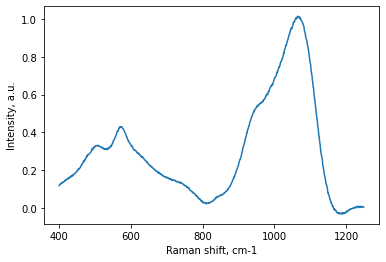

In [5]:
T_range = np.arange(T_start, T_stop, 1.0)

viscosity = neuralmodel.predict(equation,np.array(composition).reshape(1,-1)*np.ones((len(T_range),4)),T_range.reshape(-1,1))
tg = neuralmodel.predict("tg", np.array(composition).reshape(1,-1))
sctg = neuralmodel.predict("sctg", np.array(composition).reshape(1,-1))
fragility = neuralmodel.predict("fragility", np.array(composition).reshape(1,-1))
density = neuralmodel.predict("density", np.array(composition).reshape(1,-1))
ri = neuralmodel.predict("sellmeier", np.array(composition).reshape(1,-1), [589.0])

A_TVF = neuralmodel.predict("a_tvf", np.array(composition).reshape(1,-1))
B_TVF = neuralmodel.predict("b_tvf", np.array(composition).reshape(1,-1))
C_TVF = neuralmodel.predict("c_tvf", np.array(composition).reshape(1,-1))

raman = neuralmodel.predict("raman_pred", np.array(composition).reshape(1,-1))

print('')
print('Results for composition with mol fractions')
print('{} SiO2, {} Al2O3, {} Na2O, {} K2O'.format(composition[0],composition[1],composition[2],composition[3]))
print('')
print('Tg is of {:.0f} +/- {:.0f}'.format(tg.mean(axis=1)[0], tg.std(axis=1)[0]))
print('Sconf at Tg is of {:.1f} +/- {:.1f}'.format(sctg.mean(axis=1)[0], sctg.std(axis=1)[0]))
print('')
print('Fragility is of {:.1f} +/- {:.1f}'.format(fragility.mean(axis=1)[0], fragility.std(axis=1)[0]))
print('Density is of {:.3f} +/- {:.3f}'.format(density.mean(axis=1)[0], density.std(axis=1)[0]))
print('Refractive Index at 598 nm is of {:.3f} +/- {:.3f}'.format(ri.mean(axis=1)[0], ri.std(axis=1)[0]))
print('')
print('Parameter A for VFT is of {:.2f}'.format(A_TVF.mean(axis=1)[0]))
print('Parameter B for VFT is of {:.1f}'.format(B_TVF.mean(axis=1)[0]))
print('Parameter C for VFT is of {:.1f}'.format(C_TVF.mean(axis=1)[0]))

# Plotting the Raman spectra
x_raman_shift = np.arange(400.,1250.,1.0)
plt.figure()
plt.plot(x_raman_shift,raman.mean(axis=2).ravel())
plt.xlabel("Raman shift, cm-1")
plt.ylabel("Intensity, a.u.")
plt.show()